<a href="https://colab.research.google.com/github/Badisj/Recurrent-Neural-Nets-NLP/blob/main/basic_tokenizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science en pratique

Arthur Llau, Data Scientist chez Flowlity : arthur@flowlity.com

# Introduction aux données textuelles et au NLP

NLP : Natural Language Processing -> Traitement Automatique du Langage.
Origine ~1950 avec les Tests de Turing.

Le NLP recoupe les problématiques liées aux données textuelles, comme par exemple:
- La traduction automatique
- Génération de texte
- Reconnaissance d'écriture
- Topic Modelling
- Chatbot
- Text Mining
- Des problèmes plus classiques de classification et régréssion.
- Et beaucoup d'autres sujets, c'est un pan très vaste de la recherche.


Aujourd'hui nous tâcherons d'étudier diverses techniques permettant de tirer de l'information de données textuelles pour construire un modèle de classification multi-classes.

Le problème est de réaliser un modèle performant pour classifier des textes selon leur auteur. Les données sont issues du Kaggle : https://www.kaggle.com/c/spooky-author-identification



Le cours/TP se déroulera selon les axes suivants:
- **1** Import et préparation des données
- **2** Création de features naïfs
- **3** Représentation des données textuelles
- **4** Tokenization Avancée
- **5** Autres modèles & Word Embeddings


## 1 - Import et préparation des données.

In [ ]:
import sys
import nltk
import string
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook 
warnings.filterwarnings('ignore')

**1.1** Commençons par importer les données, et affichons quelques lignes du jeu de données. 


In [ ]:
data = pd.read_csv('data.csv')
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
np.unique(data.author)

array(['EAP', 'HPL', 'MWS'], dtype=object)

**1.2** Récuper d'un côté les variables cibles, et de l'autre les variables text.

In [ ]:
y = data.author
X = data.text

**1.3** Afficher les 3 premiers extrait de texte.

In [ ]:
for i in range(3):
    print(X[i])

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
It never once occurred to me that the fumbling might be a mere mistake.
In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.


**1.4** Pouvons nous traiter les données telles quelles ? Quel problème pourrait-il y avoir sur l'intégrité des données ?

**NON**: les types de données ne sont pas traitables comme elles ne sont pas numeriques.

C'est ici qu'intervient le phénomène de **tokenization**. Tokenizer une phrase revient à la séparer en tokens, c'est-à-dire en mots ou symboles distincts. D'un texte on extrait un vecteur de tokens.

La phrase **Il fait beau et, chaud** devient le vecteur **[ "Il", "fait", "beau", "et", ",",  "chaud" ]**.

En python, il existe un attribut split() qui permet de séparer une phrase selon ses mots. Essayer sur la phrase précédente. Que constatez-vous?

In [ ]:
lis = [ "Il", "fait", "beau", "et", ",",  "chaud" ]

In [ ]:
txt = "welcome to the jungle"
x = txt.split()
print(x)

['welcome', 'to', 'the', 'jungle']


In [ ]:
list(np.split(lis, indices_or_sections = [])[0])

['Il', 'fait', 'beau', 'et', ',', 'chaud']

Intéressons nous désormais au stopword. Un stopword est un mot très fréquent dans une langue et que l'on retrouve réguliérement dans des phrases, comme par exemple des conjonctions de coordination. La liste des stopword existant par langue est présente dans NLTK : corpus.stopwords.words('langue'). Afficher alors les cinq premiers stopword français et anglais.

In [ ]:
from nltk.corpus import stopwords
sw = stopwords.words("english")
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
sw = stopwords.words('french')
sw[:5]

['au', 'aux', 'avec', 'ce', 'ces']

Une fois ces idées basiques en place, il est temps de s'attaquer à ce problème de classification. Mais avant cela, construisez la tokenization de chaque texte du jeu de données.

In [ ]:
X_lis = []
for i in range(X.shape[0]):
    X_lis.append(X[i].split())

In [ ]:
X_lis

[['This',
  'process,',
  'however,',
  'afforded',
  'me',
  'no',
  'means',
  'of',
  'ascertaining',
  'the',
  'dimensions',
  'of',
  'my',
  'dungeon;',
  'as',
  'I',
  'might',
  'make',
  'its',
  'circuit,',
  'and',
  'return',
  'to',
  'the',
  'point',
  'whence',
  'I',
  'set',
  'out,',
  'without',
  'being',
  'aware',
  'of',
  'the',
  'fact;',
  'so',
  'perfectly',
  'uniform',
  'seemed',
  'the',
  'wall.'],
 ['It',
  'never',
  'once',
  'occurred',
  'to',
  'me',
  'that',
  'the',
  'fumbling',
  'might',
  'be',
  'a',
  'mere',
  'mistake.'],
 ['In',
  'his',
  'left',
  'hand',
  'was',
  'a',
  'gold',
  'snuff',
  'box,',
  'from',
  'which,',
  'as',
  'he',
  'capered',
  'down',
  'the',
  'hill,',
  'cutting',
  'all',
  'manner',
  'of',
  'fantastic',
  'steps,',
  'he',
  'took',
  'snuff',
  'incessantly',
  'with',
  'an',
  'air',
  'of',
  'the',
  'greatest',
  'possible',
  'self',
  'satisfaction.'],
 ['How',
  'lovely',
  'is',
  'sprin

In [ ]:
# réponse

[list(['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.'])
 list(['It', 'never', 'once', 'occurred', 'to', 'me', 'that', 'the', 'fumbling', 'might', 'be', 'a', 'mere', 'mistake', '.'])]


## 2 - Création de features naïfs.

**2.1** À travers la méthode citée plus haut et de fonctions basiques construisez un jeu de données utilisable avec une régression logistique - par exemple, le nombre de mots, la longueur des mots; le nombre de stopwords etc... 

In [ ]:
len(X_lis)

19579

In [ ]:
k, long_par = 0, []
avg_long_mot = []
nb_stops = []

for i in X_lis:
    long_par.append(len(i))
    long_mot = []
    for j in range(len(i)):
        long_mot.append(len(i[j]))
    avg_long_mot.append(np.asarray(long_mot).mean())
    nb_stops.append(pd.Series(i).isin(stopwords.words("english")).sum()) 

In [ ]:
nb_stops = np.array(nb_stops)
avg_long_mot = np.array(avg_long_mot)
long_par = np.array(long_par)

**2.2** Visualisez quelques-un des features construits plus haut aisni que leur incidence par auteur.

In [ ]:
X1 = pd.DataFrame(np.array([nb_stops, avg_long_mot, long_par]).T, 
                  columns = ['nb_stops', 'avg_long_mot', 'long_par'])

In [ ]:
X1.head()

,nb_stops,avg_long_mot,long_par
0,16.0,4.658537,41.0
1,7.0,4.142857,14.0
2,15.0,4.583333,36.0
3,11.0,5.088235,34.0
4,11.0,5.481481,27.0


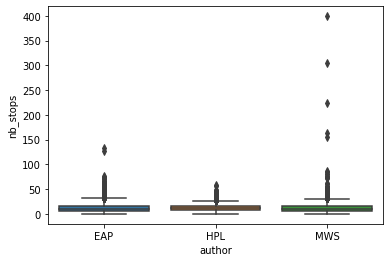

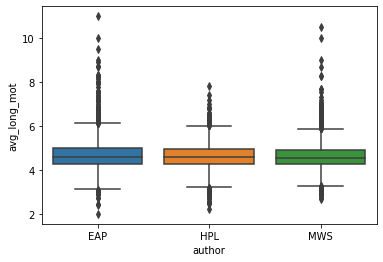

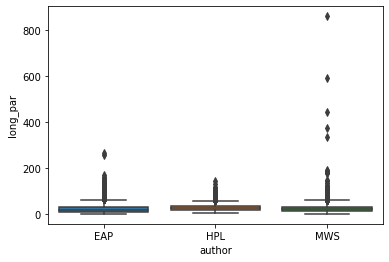

In [ ]:
for i in X1.columns:
    plt.figure()
    sns.boxplot(x = y, y = X1[i])

**2.3** Effectuez une 3-CV avec une régression logistisque pour évaluer les performances moyennes sur ce jeu de donnée. 

N'oubliez pas de transformer les variables cibles en catégorielles ! 

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import OrdinalEncoder

y1 = OrdinalEncoder().fit_transform(y.to_numpy().reshape(-1,1))
clf = LogisticRegressionCV(cv = 3).fit(X1,y1)

In [ ]:
print('Performance Logistic Regression', clf.score(X1,y1))

Performance Logistic Regression 0.418816078451402


## 3 - Représentation des données textuelles

Nous avons vu l'importance de tokenizer les textes pour en extraire de l'information. Mais ne peut-on pas utiliser ces tokens pour représenter les phrases sous forme numérique ?

Que pourrait-on faire ?

réponse

#### 3.1 Bags-Of-Words

C'est la manière la plus simple de représenter des données textuelles. On ne tient plus compte de la structure du texte et on ne regarde uniquement combien de fois apparait chaque mot du corpus dans chaque texte.

La représentation en bags of words se déroule en trois étapes distinctes:
- **1** Tokenization de chaque document du corpus (chaque texte dans notre cas).
- **2** Construction du vocabulaire du corpus, on récupere tous les tokens existant.
- **3** On construit un vecteur pour chaque observation avec le nombre d'apparition de chaque mot du vocabulaire.

L'ouput de cet algorithme est une matrice de taille (nb observations, nb de mots unique du corpus).
*CountVectorizer* est une implémentation de cette méthode, présente dans sklearn, qui effectue les trois étapes.

Imagons cette méthode: on dispose du corpus suivant ["La vie est douce", "La vie est tranquille et est belle"]
- **1** Tokenization :  [[La,vie,est,douce],[La,vie, est, tranquille, et, est, belle]]
- **2** Vocabulary building :  [La, vie, est, douce, belle, et, tranquille]
- **3** Encoding : [[1,1,1,1,0,0,0],[1,1,2,0,1,1]]



**3.1.1** Appliquer rapidement cette méthode à ces deux phrases via sklearn. Affichez le vocabulaire, la représentation et son type.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
inputs = ["La vie est douce", "La vie est tranquille et est belle"]

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(inputs)

In [ ]:
X.toarray()

array([[0, 1, 1, 0, 1, 0, 1],
       [1, 0, 2, 1, 1, 1, 1]])

In [ ]:
X

<2x7 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

**3.1.2** Construiser la matrice sparse représentant le jeu de donnée, et évaluer les performances de votre régression logistique sur ces nouvelles observations.

In [ ]:
X = data.text
X2 = vectorizer.fit_transform(X)

In [ ]:
X2

<19579x25068 sparse matrix of type '<class 'numpy.int64'>'
	with 429602 stored elements in Compressed Sparse Row format>

In [ ]:
print(X2.toarray(), 
      X2.toarray().shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (19579, 25068)


In [ ]:
clf = LogisticRegressionCV(cv = 3).fit(X2, y1)
print('Performance Logistic Regression', clf.score(X2, y1))

Performance Logistic Regression 0.9630216047806323


#### 3.2 Term Frequency - Inverse Document Frequency (TF-IDF)

Plutôt que de mettre du poids sur l'apparition des tokens que l'on observe une autre approche est de normaliser les tokens de chaque texte grâce à l'information qu'ils apportent. L'idée de TF-IDF est repose sur le même schéma que précédemment excepté que l'on donne un poid important aux tokens qui apparaissent souvent dans un document en particulier mais pas dans tous les documents du corpus. Ces mots apportent beaucoup d'information sur le contenu du document. 



La formule mathématique est simple :

![word2vec](td-idf-graphic.png)
De même, on retrouve une implémentation de cette méthode sous sklearn.

**3.1.2** Appliquer rapidement cette méthode à ces deux phrases via sklearn. Affichez le vocabulaire, la représentation et son type.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X33 = vectorizer.fit_transform(inputs)

In [ ]:
vectorizer.vocabulary_

{'la': 4, 'vie': 6, 'est': 2, 'douce': 1, 'tranquille': 5, 'et': 3, 'belle': 0}

In [ ]:
X33

<2x7 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
print(X33.toarray(), 
      X33.toarray().shape)

[[0.         0.63009934 0.44832087 0.         0.44832087 0.
  0.44832087]
 [0.40697968 0.         0.57913879 0.40697968 0.2895694  0.40697968
  0.2895694 ]] (2, 7)


**3.1.3** Construiser la matrice sparse représentant le jeu de donnée, et évaluer les performances de votre régression logistique sur ces nouvelles observations.

In [ ]:
X3 = vectorizer.fit_transform(X)
X3

<19579x25068 sparse matrix of type '<class 'numpy.float64'>'
	with 429602 stored elements in Compressed Sparse Row format>

In [ ]:
print(X3.toarray(), 
      X3.toarray().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (19579, 25068)


In [ ]:
clf = LogisticRegressionCV(cv = 3).fit(X3, y1)
print('Performance Logistic Regression', clf.score(X3, y1))

Performance Logistic Regression 0.9630216047806323


#### 3.3 Paramétrisation des bags-of-words et de TF-IDF

Évidemment ces deux méthodes disposent de multiples paramètres, en voici un tour d'horizon.

Un des défauts de ces deux méthodes est que les tokenizations ne conservent pas l'ordre des mots dans la phrase. On ne dispose alors pas de toute l'information possible, par exemple : "not beautiful" n'a pas le même apport d'information que "not" "beautiful" dans le sens numérique.

C'est pourquoi on peut utiliser des _n-gram_ à partir des documents initiaux, "un n-gramme est une sous-séquence de n éléments construite à partir d'une séquence donnée". Ils permettent de capturer le contexte de la phrase. Un _unigram_ n'est autre qu'un tokens, un _bigram_ 2 mots à la suite etc..

Le paramètre **ngram_range** permet de choisir le range de _n-gram_ choisis.

Par exemple si l'on choisit un ngram_range = (1,3), nous allons obtenir des tokens de taille 1 mot, 2 mots, et 3 mots.


In [ ]:
texte = ["La vie est douce","La vie est tranquille et est belle"]
vec = CountVectorizer(ngram_range=(1,3))
X = vec.fit_transform(texte)
print ("Vocabulary {} \n".format(vec.vocabulary_))
print ("CountVectorizer + n-grams : \n {} \n".format(X.toarray()))
print ('Shape {}'.format(repr(X)))

Vocabulary {'la': 10, 'vie': 16, 'est': 2, 'douce': 1, 'la vie': 11, 'vie est': 17, 'est douce': 4, 'la vie est': 12, 'vie est douce': 18, 'tranquille': 13, 'et': 7, 'belle': 0, 'est tranquille': 5, 'tranquille et': 14, 'et est': 8, 'est belle': 3, 'vie est tranquille': 19, 'est tranquille et': 6, 'tranquille et est': 15, 'et est belle': 9} 

CountVectorizer + n-grams : 
 [[0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0]
 [1 0 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]] 

Shape <2x20 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>


Comme nous l'avons vu plus haut les stopwords ne possède aucune information particulière. C'est pourquoi il est possible grâce à l'option **stop_words** de ne pas les considérer. Il suffit d'indiquer la langue choisie.

In [ ]:
texte = ["La vie est douce","La vie est tranquille et est belle"]
vec = CountVectorizer(ngram_range=(1,3),stop_words =nltk.corpus.stopwords.words('french'))
X = vec.fit_transform(texte)
print ("Vocabulary {} \n".format(vec.vocabulary_))
print ("CountVectorizer + n-grams : \n {} \n".format(X.toarray()))
print ('Shape {}'.format(repr(X)))

Vocabulary {'vie': 4, 'douce': 1, 'vie douce': 5, 'tranquille': 2, 'belle': 0, 'vie tranquille': 6, 'tranquille belle': 3, 'vie tranquille belle': 7} 

CountVectorizer + n-grams : 
 [[0 1 0 0 1 1 0 0]
 [1 0 1 1 1 0 1 1]] 

Shape <2x8 sparse matrix of type '<class 'numpy.longlong'>'
	with 9 stored elements in Compressed Sparse Row format>


**max_df** et **min_df** sont des paramètres de threshold pour séléctionner les tokens utilisés:

- **max_df** représente le nombre maximum d'occurences pour les tokens dans le corpus.
- **min_df** représente le nombre minimum d'apparition d'un tokens dans les documents du corpus.

In [ ]:
texte = ["La vie est douce","La vie est tranquille et est belle"]
vec = CountVectorizer(ngram_range=(1,3),max_df =1)
X = vec.fit_transform(texte)
print ("Vocabulary {} \n".format(vec.vocabulary_))
print ("CountVectorizer + n-grams : \n {} \n".format(X.toarray()))
print ('Shape {}'.format(repr(X)))


texte = ["La vie est douce","La vie est tranquille et est belle"]
vec = CountVectorizer(ngram_range=(1,3), min_df = 2)
X = vec.fit_transform(texte)
print ("Vocabulary {} \n".format(vec.vocabulary_))
print ("CountVectorizer + n-grams : \n {} \n".format(X.toarray()))
print ('Shape {}'.format(repr(X)))

Vocabulary {'douce': 1, 'est douce': 3, 'vie est douce': 12, 'tranquille': 9, 'et': 6, 'belle': 0, 'est tranquille': 4, 'tranquille et': 10, 'et est': 7, 'est belle': 2, 'vie est tranquille': 13, 'est tranquille et': 5, 'tranquille et est': 11, 'et est belle': 8} 

CountVectorizer + n-grams : 
 [[0 1 0 1 0 0 0 0 0 0 0 0 1 0]
 [1 0 1 0 1 1 1 1 1 1 1 1 0 1]] 

Shape <2x14 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>
Vocabulary {'la': 1, 'vie': 4, 'est': 0, 'la vie': 2, 'vie est': 5, 'la vie est': 3} 

CountVectorizer + n-grams : 
 [[1 1 1 1 1 1]
 [2 1 1 1 1 1]] 

Shape <2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>


Le paramètre **max_features** permet de choisir les K premiers tokens par ordre de fréquence.

In [ ]:
texte = ["La vie est douce","La vie est tranquille et est belle"]
vec = CountVectorizer(ngram_range=(1,3), max_features = 2)
X = vec.fit_transform(texte)
print ("Vocabulary {} \n".format(vec.vocabulary_))
print ("CountVectorizer + n-grams : \n {} \n".format(X.toarray()))
print ('Shape {}'.format(repr(X)))

Vocabulary {'la': 1, 'est': 0} 

CountVectorizer + n-grams : 
 [[1 1]
 [2 1]] 

Shape <2x2 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>


Jouez un peu avec les paramètres d'une des deux méthodes, et observer les résultats des cross validation.

In [ ]:
X = data.text
vec = CountVectorizer(ngram_range=(1,3))
X4 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X4.toarray()))
print ('Shape {}'.format(repr(X4)))

#clf = LogisticRegressionCV(cv = 3).fit(X4, y1)
#print('Performance Logistic Regression', clf.score(X4, y1))

CountVectorizer + n-grams : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape <19579x642857 sparse matrix of type '<class 'numpy.int64'>'
	with 1365582 stored elements in Compressed Sparse Row format>


In [ ]:
vec = CountVectorizer(ngram_range=(1,3), stop_words = nltk.corpus.stopwords.words('french'))
X5 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X5.toarray()))
print ('Shape {}'.format(repr(X5)))

#clf = LogisticRegressionCV(cv = 3).fit(X5, y1)
#print('Performance Logistic Regression', clf.score(X5, y1))

CountVectorizer + n-grams : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape <19579x635659 sparse matrix of type '<class 'numpy.int64'>'
	with 1337724 stored elements in Compressed Sparse Row format>


In [ ]:
vec = CountVectorizer(ngram_range=(1,3), min_df = 3)
X6 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X6.toarray()))
print ('Shape {}'.format(repr(X6)))

clf = LogisticRegressionCV(cv = 3).fit(X6, y1)
print('Performance Logistic Regression', clf.score(X6, y1))

CountVectorizer + n-grams : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape <19579x50038 sparse matrix of type '<class 'numpy.int64'>'
	with 724773 stored elements in Compressed Sparse Row format>
Performance Logistic Regression 0.9919301292200827


In [ ]:
features_to_keep = 1000
vec = CountVectorizer(ngram_range=(1,3), max_features = features_to_keep)
X7 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X7.toarray()))
print ('Shape {}'.format(repr(X7)))

clf = LogisticRegressionCV(cv = 3).fit(X7, y1)
print('Performance Logistic Regression', clf.score(X7, y1))

CountVectorizer + n-grams : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape <19579x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 339443 stored elements in Compressed Sparse Row format>
Performance Logistic Regression 0.771540936717912


Nous avons observé que plusieurs méthodes permettent d'extraire de l'information de données textuelles, mais pourquoi ne pas les combiner ?

## 4 - Tokenization avancée

La tokenization, que nous avons utilisé, permet de décomposer un texte en tokens sans utiliser de règle grammaticale. Cette approche reste simple, et naïve : n'est il pas possible d'appliquer des règles grammaticales ou de regarder les racines des mots pour "normaliser" le texte ?

#### 4.1 Stemming

In [ ]:
#Executez le code suivant, que se passe-t-il ?

from nltk.stem import PorterStemmer
#nltk.download('punkt')

sentence = "This process, however, afforded me no means"
ps = PorterStemmer()
res = [ps.stem(w) for w in nltk.word_tokenize(sentence)]
print(res)

['thi', 'process', ',', 'howev', ',', 'afford', 'me', 'no', 'mean']


Le stemming revient à prendre la racine des mots. Il existe plusieurs type de stemmers ayant différent façon de prendre la racine. Le plus classique, celui de Porter revient à supprimer les suffixes. 

L'intérêt de cette manière de tokenizer permet de réduire l'espace des features et d'établir une certaine similarité entre les phrases/documents.


Grâce à la fonction custom tokenizer définie ci-dessous et à l'option tokenizer, construiser les deux représentations des données - Bags & TF-IDF, et évaluez les performances de la régréssion logistique.

In [ ]:
def custom_tokenizer_stem(document):
    return [ps.stem(w) for w in nltk.word_tokenize(document)]

In [ ]:
vec = CountVectorizer(tokenizer = custom_tokenizer_stem)
X8 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X8.toarray()))
print ('Shape {}'.format(repr(X8)))

clf = LogisticRegressionCV(cv = 3).fit(X8, y1)
print('Performance Logistic Regression', clf.score(X8, y1))

CountVectorizer + n-grams : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape <19579x15870 sparse matrix of type '<class 'numpy.int64'>'
	with 488551 stored elements in Compressed Sparse Row format>
Performance Logistic Regression 0.9420808008580622


In [ ]:
vec = TfidfVectorizer(tokenizer = custom_tokenizer_stem)
X9 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X9.toarray()))
print ('Shape {}'.format(repr(X9)))

clf = LogisticRegressionCV(cv = 3).fit(X9, y1)
print('Performance Logistic Regression', clf.score(X9, y1))

CountVectorizer + n-grams : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16363894 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

Shape <19579x15870 sparse matrix of type '<class 'numpy.float64'>'
	with 488551 stored elements in Compressed Sparse Row format>
Performance Logistic Regression 0.9476479901935747


#### 4.2 Lemmatization

In [ ]:
#Executez le code suivant, que se passe-t-il ?

from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

Lem = WordNetLemmatizer()
sentence = "This process, however, afforded me no means of ascertaining the dimensions of my dungeon"
res = [Lem.lemmatize(w,pos = 'v') for w in nltk.word_tokenize(sentence)]
print(res)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bedisjaouani/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['This', 'process', ',', 'however', ',', 'afford', 'me', 'no', 'mean', 'of', 'ascertain', 'the', 'dimension', 'of', 'my', 'dungeon']


La lemmatisation d'un token consiste à en prendre sa forme canonique. C'est-à-dire :

   - pour un verbe : ce verbe à l'infinitif
   - pour les autres mots : le mot au masculin singulier


L'option _pos_ est une option permettant de faire du Part-of-speech tagging, c'est-à-dire que l'on va donner la bonne catégorie grammaticale à nos mots.

Grâce à la fonction custom tokenizer définie ci-dessous et à l'option tokenizer, construiser les deux représentations des données - Bags & TF-IDF, et évaluez les performances de la régréssion logistique.

In [ ]:
def custom_tokenizer_lem(document):
    return [Lem.lemmatize(w,pos='v') for w in nltk.word_tokenize(document)]

In [ ]:
vec = CountVectorizer(tokenizer = custom_tokenizer_lem)
X10 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X10.toarray()))
print ('Shape {}'.format(repr(X10)))

clf = LogisticRegressionCV(cv = 3).fit(X10, y1)
print('Performance Logistic Regression', clf.score(X10, y1))

CountVectorizer + n-grams : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape <19579x19891 sparse matrix of type '<class 'numpy.int64'>'
	with 485190 stored elements in Compressed Sparse Row format>
Performance Logistic Regression 0.9460646611165023


In [ ]:
vec = TfidfVectorizer(tokenizer = custom_tokenizer_lem)
X11 = vec.fit_transform(X)

print ("CountVectorizer + n-grams : \n {} \n".format(X11.toarray()))
print ('Shape {}'.format(repr(X11)))

clf = LogisticRegressionCV(cv = 3).fit(X11, y1)
print('Performance Logistic Regression', clf.score(X11, y1))

CountVectorizer + n-grams : 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16537099 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 

Shape <19579x19891 sparse matrix of type '<class 'numpy.float64'>'
	with 485190 stored elements in Compressed Sparse Row format>
Performance Logistic Regression 0.9538791562388274


## 5 - Autres Modèles & Word Embedding


Une façon évidente d'améliorer les prédictions serait d'utiliser d'autres modèles et faire de l'ensembling, plutôt que d'utiliser une simple régréssion logistique.

La littérature de NLP regorge d'algorithmes très performant selon le type et le traitement de données textuelles. Un simple naïve bayes peut être très efficace[*](https://web.stanford.edu/class/cs124/lec/naivebayes.pdf).


In [ ]:
from sklearn.naive_bayes import MultinomialNB
cv = cross_val_score(MultinomialNB(), data_bags,y,scoring='accuracy',cv=3)
print ('Performance Naïve Bayes {} +/- {}'.format(cv.mean(),cv.std()) )

Performance Naïve Bayes 0.8346698062378012 +/- 0.0005712080112283825


In [ ]:
from sklearn.naive_bayes import MultinomialNB
cv = cross_val_score(MultinomialNB(),lem_bags,y,scoring='accuracy',cv=3)
print ('Performance Naïve Bayes {} +/- {}'.format(cv.mean(),cv.std()) )

Performance Naïve Bayes 0.8362023027851823 +/- 0.003457351690482563


In [ ]:
from sklearn.naive_bayes import MultinomialNB
cv = cross_val_score(MultinomialNB(),stem_bags,y,scoring='accuracy',cv=3)
print ('Performance Naïve Bayes {} +/- {}'.format(cv.mean(),cv.std()) )

Performance Naïve Bayes 0.8342613721298155 +/- 0.003339793730133656


Par rapport au dernier cours, que pensez vous de ces résultats ? Comment pourrait-on améliorer les performances ?

Néanmoins, la majeur partie des problèmes de NLP sont traités avec différentes architecture de réseaux de neurones. On retrouve par exemple:
- Les Long Short Term Memory (LSTM)
- Les bi-LSTM
- Les Gated Reccurent Unit (GRU)
- Certains CNN et d'autres architectures spécifiques[*](https://arxiv.org/pdf/1708.02709.pdf)

Mais comme vous le savez, la meilleure façon d'améliorer les performances d'un modèle repose sur le traitement des données. Nous avons vu quelques façon de représenter les données qui reste simple mais suffisantes pour obtenir une performance plus que correct. 

Néanmoins, un pan de la recherche en NLP s'est penché sur des techniques permettant d'améliorer : les word embedding. 
Le but de ces techniques est d'apprendre la meilleure représentation dans un espace vectoriel de mots.
Ce sont des modèles pré-entrainé sur d'immenses corpus - tout wiki par exemple - et qu'on adapte pour fournir une bonne représentation des données dans le problème que l'on cherche à résoudre.

On retrouve plusieurs méthodes très efficaces avec des algorithmes très différents :
- Word2Vec - Google[*](https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf)
- Glove2Vec - Stanford [*](https://github.com/stanfordnlp/GloVe)
- FastText - Facebook [*](https://github.com/facebookresearch/fastText)

![](word2vec.png)


Dernière avancées majeures en NLP :
- Ulmfit : https://arxiv.org/abs/1801.06146
- BERT : https://arxiv.org/abs/1810.04805
- ELMO : https://arxiv.org/abs/1802.05365
- AlBert : https://paperswithcode.com/paper/albert-a-lite-bert-for-self-supervised
Un coup d'oeil au repo https://github.com/huggingface/transformers vous donnera une idée des dernières avancées dans ce domaine.